In [7]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import locale as loc

loc.setlocale(loc.LC_ALL, "")
loc.atof("123,456")

123.456

In [8]:
values = dict()
jerk = []
sim = []
exp = []
no_sim = []
with open("prusa_mini_exp_sim_nosim.csv") as file:
    data = csv.DictReader(file, delimiter=",")
    for row in data:
        jerk.append(loc.atof(row["jerk"]))
        sim.append(loc.atof(row["simulation"]))
        exp.append(loc.atof(row["experiment"]))
        no_sim.append(loc.atof(row["no simulation"]))
values["jerk"] = jerk
values["sim"] = sim
values["exp"] = exp
values["no_sim"] = no_sim

In [9]:
values

{'jerk': [1.0, 5.0, 7.0, 10.0, 15.0, 20.0, 30.0],
 'sim': [70.56, 65.63, 63.49, 60.78, 57.31, 55.12, 54.2],
 'exp': [70.6, 65.9, 63.9, 61.2, 57.8, 55.5, 54.1],
 'no_sim': [53.9, 53.9, 53.9, 53.9, 53.9, 53.9, 53.9]}

In [10]:
# Font
plt.rcParams["font.size"] = 14
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"  # dejavuserif, stixsans, cm

# Line colors
colormap = "Dark2"
num = 9
colors = [plt.get_cmap(colormap)(float(i) / num) for i in range(1, num)]

In [11]:
ypoints = values["jerk"]

x1points = values["sim"]
x2points = values["exp"]
x3points = values["no_sim"]

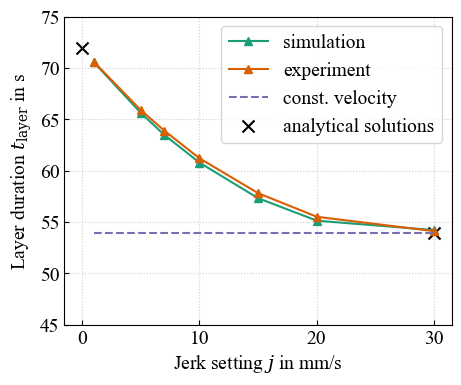

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

ax.plot(ypoints, x1points, color=colors[0], label="simulation", marker="^")
ax.plot(ypoints, x2points, color=colors[1], label="experiment", marker="^")
ax.plot(ypoints, x3points, color=colors[2], label="const. velocity", linestyle="--")
ax.scatter([0, 30], [71.93, 53.9], marker="x", c="black", label="analytical solutions", s=75)

plt.ylabel(r"Layer duration $t_\mathrm{layer}$ in s")
plt.xlabel(r"Jerk setting $j$ in mm/s")

plt.ylim(45, 75)

plt.legend()
plt.grid(visible=True, which="major", axis="both", alpha=0.6, linestyle="dotted")
plt.tick_params(direction="in")

plt.savefig(r"..\..\..\paper\plot.svg", transparent=True)
# plt.savefig(r"test.png", transparent=True)
# plt.show()